## Neural Network Classifier Example

This notebook demonstrates how to train a simple dense neural network for classification using synthetic 2D data. We use the custom `blobs_data` generator and visualize both the training data and the decision surface of the trained model.

In [14]:
from ml.nn import *
from ml.optimizers import Adam
from ml.losses import CategoricalCrossentropy
from ml.datasets import blobs_data
import matplotlib.pyplot as plt 

### Generate Dataset

We generate a 2D synthetic dataset consisting of several Gaussian blobs, each representing a different class.

(800, 2)
(800,)


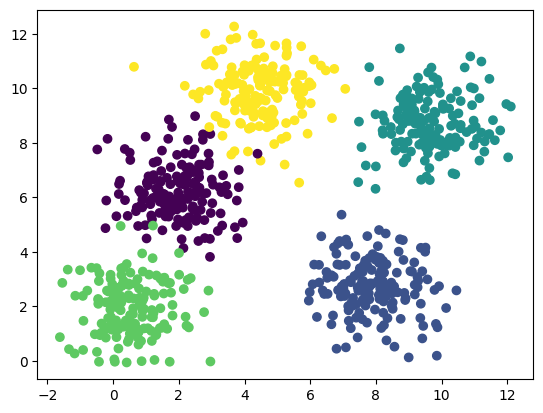

In [15]:
X, y, X_test, y_test = blobs_data(classes=5, samples_per_class=200, seed=1234, test_split=0.2)
print(X.shape)
print(y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y)

### Build the Model

We construct a simple feedforward neural network with two hidden layers.

In [16]:
model = Model(
    Dense(X.shape[1], 64),
    LeakyReLU(alpha=0.3),
    Dense(64,64),
    LeakyReLU(alpha=0.3),
    Dense(64,64),
    LeakyReLU(alpha=0.3),
    Dense(64, 5),
    Softmax()
)

model.set(loss=CategoricalCrossentropy(), 
          optimizer=Adam(learning_rate=0.0001, decay=1e-2), 
          accuracy=AccuracyCategorical())

model.finalize()
model.summary(X.shape[1])

╔════════════════════════════════════════╗
║           Model Architecture           ║
╠════╬═══════════╬══════════════╬════════╣
║ #  ║ Layer     ║ Output Shape ║ Params ║
╠════╬═══════════╬══════════════╬════════╣
║ 1  ║ Dense     ║ (None, 64)   ║    192 ║
║ 2  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 3  ║ Dense     ║ (None, 64)   ║   4160 ║
║ 4  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 5  ║ Dense     ║ (None, 64)   ║   4160 ║
║ 6  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 7  ║ Dense     ║ (None, 5)    ║    325 ║
║ 8  ║ Softmax   ║ (None, 5)    ║      0 ║
╚════╩═══════════╩══════════════╩════════╝
Total trainable parameters: 8,837


### Train the Model

We train the model on the synthetic blobs dataset.

In [17]:
X_test, y_test

(array([[ 3.12157836, 10.9986673 ],
        [ 3.09713861,  6.61245916],
        [ 1.47318044,  1.02338088],
        [11.87735734,  7.54919437],
        [ 4.95315713,  9.40140088],
        [ 9.61234452,  7.85359559],
        [ 4.86506349, 10.45262641],
        [ 2.22316336,  6.01258895],
        [ 8.51329585,  8.78085403],
        [ 1.50624903, -0.58113261],
        [-0.70298953,  3.43987143],
        [ 9.76510516,  8.45909925],
        [ 9.17710557,  7.76272452],
        [ 0.93929779,  3.94865456],
        [ 4.26862693,  9.20236341],
        [ 4.96479026, 10.17427479],
        [ 3.58782131,  5.6802879 ],
        [ 4.53984513, 10.90306722],
        [10.02886726,  8.20262536],
        [ 7.87985783,  1.38651493],
        [-0.45627997,  2.10764877],
        [ 1.32696778,  6.24702942],
        [10.46092704,  9.05839509],
        [ 0.95359226,  7.46669765],
        [ 9.88340428,  8.26966471],
        [ 7.63604688,  3.41544925],
        [10.01486693,  8.70926716],
        [ 7.25601769,  3.401

In [18]:
model.train(X,y, epochs=500, print_every=100, batch_size=64, validation_data=(X_test, y_test))

epoch: 1
step: 0, acc: 0.250 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 0.0001
step: 12, acc: 0.281 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 8.928571428571429e-05
training, acc: 0.200 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 8.928571428571429e-05
validation, acc: 0.230 loss: 1.609
epoch: 2
step: 0, acc: 0.234 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 8.849557522123895e-05
step: 12, acc: 0.344 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 8e-05
training, acc: 0.229 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 8e-05
validation, acc: 0.315 loss: 1.609
epoch: 3
step: 0, acc: 0.500 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 7.936507936507937e-05
step: 12, acc: 0.344 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 7.246376811594204e-05
training, acc: 0.352 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 7.246376811594204e-05
validation, acc: 0.370 loss: 1.609
epoch: 4
step: 0, acc: 0.547 loss: 1.609 data_loss: 1.609 reg_loss: 0.000 lr: 7.1942446043

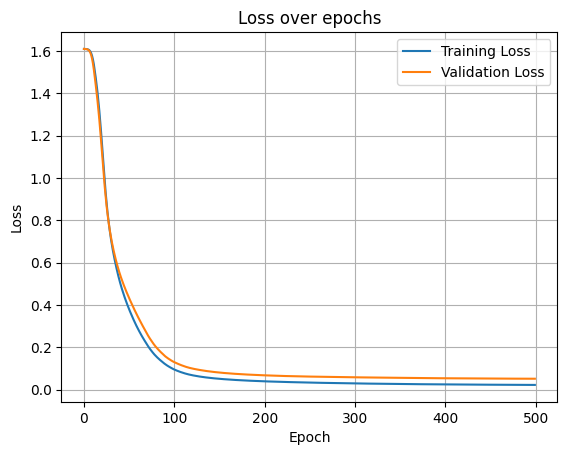

In [19]:
model.plot_loss()

### Visualize Decision Surface

Let's visualize the model's decision boundaries by plotting the predicted class for each point in the 2D input space.

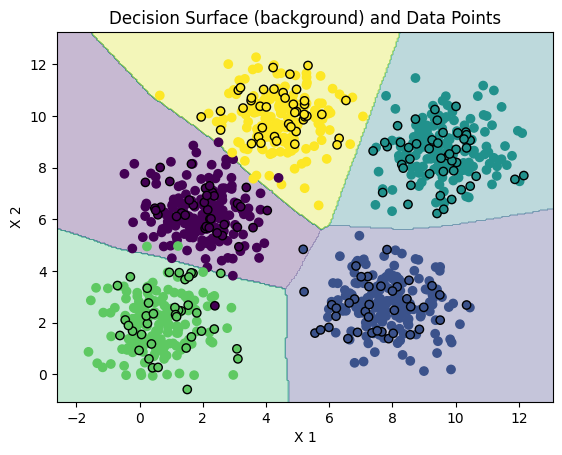

In [20]:
import numpy as np

h = 0.05  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("X 1")
plt.ylabel("X 2")
plt.title("Decision Surface (background) and Data Points")
plt.show()

In [21]:
model.save_parameters("./models/parameters.par")

In [22]:
model = Model(
    Dense(X.shape[1], 64),
    LeakyReLU(alpha=0.3),
    Dense(64,64),
    LeakyReLU(alpha=0.3),
    Dense(64,64),
    LeakyReLU(alpha=0.3),
    Dense(64, 5),
    Softmax()
)

model.set(loss=CategoricalCrossentropy(), 
          optimizer=Adam(learning_rate=0.0001, decay=1e-2), 
          accuracy=AccuracyCategorical())

model.finalize()
model.summary(X.shape[1])

╔════════════════════════════════════════╗
║           Model Architecture           ║
╠════╬═══════════╬══════════════╬════════╣
║ #  ║ Layer     ║ Output Shape ║ Params ║
╠════╬═══════════╬══════════════╬════════╣
║ 1  ║ Dense     ║ (None, 64)   ║    192 ║
║ 2  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 3  ║ Dense     ║ (None, 64)   ║   4160 ║
║ 4  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 5  ║ Dense     ║ (None, 64)   ║   4160 ║
║ 6  ║ LeakyReLU ║ (None, 64)   ║      0 ║
║ 7  ║ Dense     ║ (None, 5)    ║    325 ║
║ 8  ║ Softmax   ║ (None, 5)    ║      0 ║
╚════╩═══════════╩══════════════╩════════╝
Total trainable parameters: 8,837


In [23]:
model.load_parameters('./models/parameters.par')

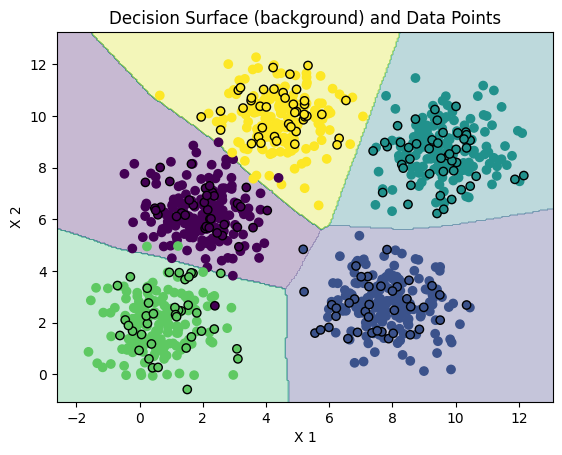

In [24]:
h = 0.05  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points)
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("X 1")
plt.ylabel("X 2")
plt.title("Decision Surface (background) and Data Points")
plt.show()